<a href="https://colab.research.google.com/github/pedroafleite/auto-mpg/blob/main/auto_mpg_1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg/auto-mpg.csv')

1. mpg: continuous. (mpg is miles per gallon)
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [ ]:
df.shape

(398, 9)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
auto = train_set.copy()

In [ ]:
auto.shape

(318, 9)

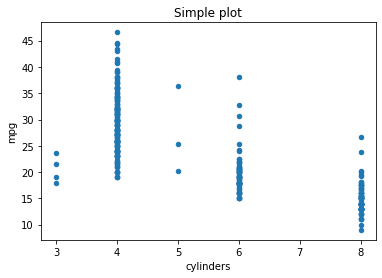

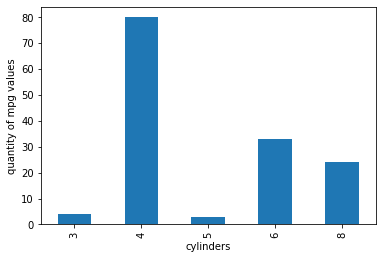

In [ ]:
auto.plot(kind='scatter', x='cylinders', y='mpg', xlabel='cylinders', ylabel='mpg',
       title='Simple plot')
plt.show()

auto.groupby('cylinders')['mpg'].nunique().plot(kind='bar', xlabel='cylinders', ylabel='quantity of mpg values')
plt.show()

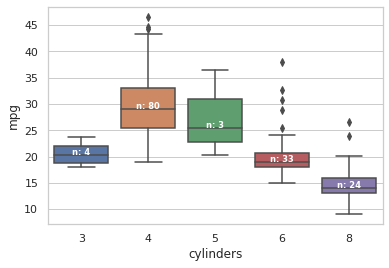

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="cylinders", y="mpg", data=auto)

# Calculate number of obs per group & median to position labels
medians = auto.groupby('cylinders')['mpg'].median().values
nobs = auto.groupby('cylinders')['mpg'].nunique().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
  ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
  horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [ ]:
auto.groupby(['cylinders'])['mpg'].nunique().values

array([ 4, 80,  3, 33, 24])

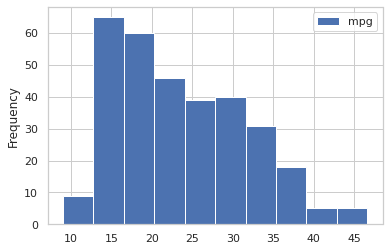

In [ ]:
auto.plot(kind='hist', y='mpg', xlabel='mpg')
plt.show()

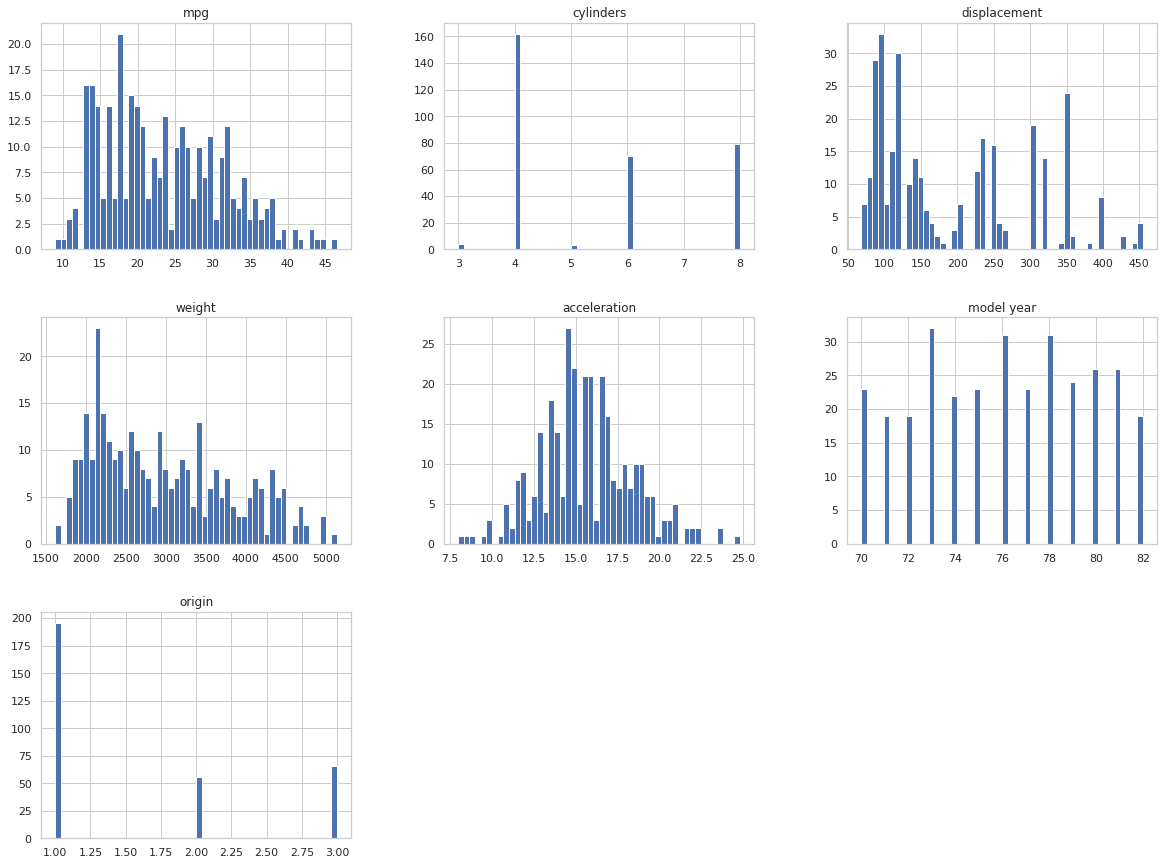

In [ ]:
auto.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ada666cc0>,
      dtype=object)

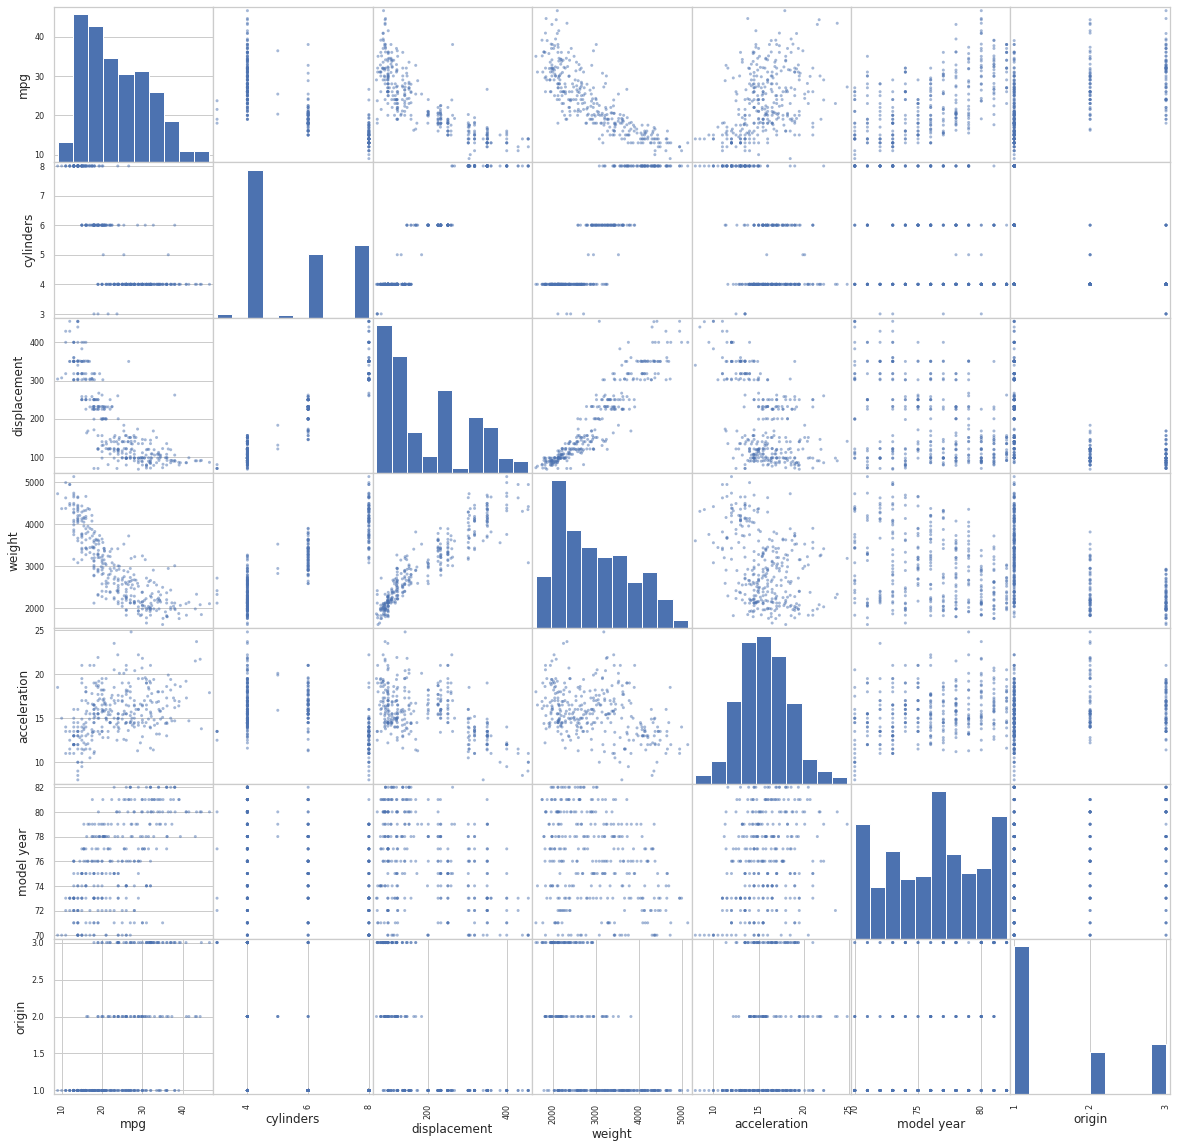

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'car name']
scatter_matrix(auto[attributes], figsize=(20, 20))

There are a few correlations:
1. mpg vs. displacement
2. mpg vs. weight
3. mpg vs. acceleration
4. displacement vs. acceleration
5. displacement vs. weight
6. acceleration vs. weight

But most of these are non-linear correlations.

In [ ]:
auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,318.000000,318.000000,318.000000,318,318.000000,318.000000,318.000000,318.000000,318
unique,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,246
top,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,toyota corolla
freq,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,5
mean,23.608176,5.430818,191.904088,NaN,2969.015723,15.639937,76.103774,1.591195,NaN
std,7.930574,1.684947,102.983802,NaN,840.617729,2.763269,3.603177,0.811696,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,98.500000,NaN,2220.000000,13.900000,73.000000,1.000000,NaN
50%,22.450000,4.000000,148.500000,NaN,2822.500000,15.500000,76.000000,1.000000,NaN
75%,29.725000,6.000000,259.500000,NaN,3597.250000,17.300000,79.000000,2.000000,NaN


In [ ]:
auto['mpg'].describe()

count    318.000000
mean      23.608176
std        7.930574
min        9.000000
25%       17.500000
50%       22.450000
75%       29.725000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
auto['car name'].value_counts().head(20)

toyota corolla        5
ford pinto            5
amc matador           5
chevrolet impala      4
peugeot 504           4
chevrolet chevette    4
amc hornet            4
ford maverick         4
toyota corona         3
chevrolet nova        3
plymouth fury iii     3
amc gremlin           3
pontiac catalina      3
dodge colt            3
ford gran torino      3
amc concord           2
buick century         2
toyota mark ii        2
chevrolet malibu      2
audi 100ls            2
Name: car name, dtype: int64

In [ ]:
corr_matrix = auto.corr() #standard correlation coefficient (also called Pearson’s r)

In [ ]:
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model year      0.586743
origin          0.562710
acceleration    0.390101
cylinders      -0.770459
displacement   -0.801543
weight         -0.827333
Name: mpg, dtype: float64

Most relationships seem to be non-linear, or polynomial.

Let's take the relationship miles per gallon (mpg) vs. displacement, for instance:

- X: the 1st column which contains mpg array

- y: the 3rd column which contains displacement array


In [103]:
# Data needs to be ordered with respect to the predictor
auto = auto.sort_values(by=['mpg'])

X = auto[['mpg']].values
y = auto[['displacement']].values

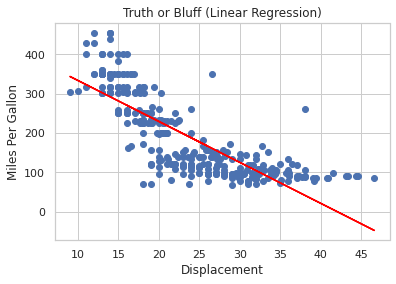

RMSE of linear regression is 61.48093774639589
R2 score of linear regression is 0.6424712414861957


In [65]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
  plt.scatter(X, y)
  plt.plot(X, lin_reg.predict(X), color='red')
  plt.title('Truth or Bluff (Linear Regression)')
  plt.xlabel('Displacement')
  plt.ylabel('Miles Per Gallon')
  plt.show()
  return
viz_linear()

rmse = np.sqrt(mean_squared_error(y,lin_reg.predict(X)))
r2 = r2_score(y,lin_reg.predict(X))
print('RMSE of linear regression is', rmse)
print('R2 score of linear regression is', r2)

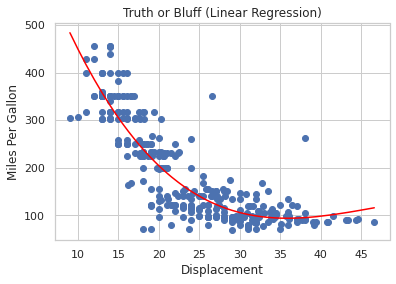

RMSE of linear regression is 48.191748258255096
R2 score of linear regression is 0.7803276591621805


In [107]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
  plt.scatter(X, y)
  plt.plot(X, pol_reg.predict(X_poly), color='red')
  plt.title('Truth or Bluff (Linear Regression)')
  plt.xlabel('Displacement')
  plt.ylabel('Miles Per Gallon')
  plt.show()
  return
viz_polymonial()

rmse = np.sqrt(mean_squared_error(y, pol_reg.predict(X_poly)))
r2 = r2_score(y, pol_reg.predict(X_poly))
print('RMSE of linear regression is', rmse)
print('R2 score of linear regression is', r2)